In [3]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

In [4]:
X, y = make_moons(n_samples = 1000, noise = 0.1)

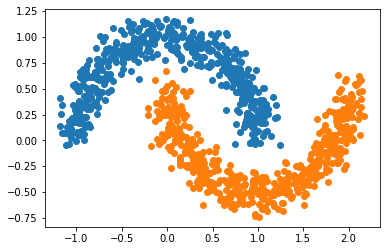

In [5]:
plt.scatter(X[:,0][y==0], X[:,1][y==0])
plt.scatter(X[:,0][y==1], X[:,1][y==1])

In [6]:
from sklearn.cluster import DBSCAN

In [7]:
dbscan = DBSCAN(eps = 0.1)

In [8]:
dbscan.fit(X)

DBSCAN(eps=0.1)

In [9]:
dbscan.core_sample_indices_.shape

(926,)

In [10]:
dbscan.labels_[dbscan.core_sample_indices_]

array([0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,

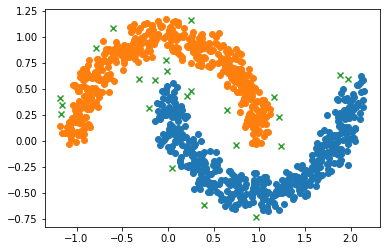

In [11]:
import numpy as np
plt.scatter(
    dbscan.components_[:,0][dbscan.labels_[dbscan.core_sample_indices_]==1], 
    dbscan.components_[:,1][dbscan.labels_[dbscan.core_sample_indices_]==1])

plt.scatter(
    dbscan.components_[:,0][dbscan.labels_[dbscan.core_sample_indices_]==0], 
    dbscan.components_[:,1][dbscan.labels_[dbscan.core_sample_indices_]==0])

plt.scatter(
    X[:,0][dbscan.labels_==-1], 
    X[:,1][dbscan.labels_==-1], marker = 'x')

## Train classifier to enable dbscan to predict the new instances

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [13]:
knn.fit(
    dbscan.components_[dbscan.labels_[dbscan.core_sample_indices_]!=-1], 
    dbscan.labels_[dbscan.core_sample_indices_][dbscan.labels_[dbscan.core_sample_indices_]!=-1])

KNeighborsClassifier(n_neighbors=1)

In [14]:
Xnew = np.array([0, 0.5]).reshape(1, -1)
ydist, ypred = knn.kneighbors(Xnew)

In [15]:
print(ypred)
print(ydist)

[[879]]
[[0.01964142]]


In [16]:
ynew = dbscan.labels_[ypred]

In [17]:
print(ynew)

[[0]]


In [20]:
def plot_decision_boundary(clf, pred_clf, X, y = [0, 1, -1], axes = [-.75, 1.25, -1.5, 2.5], min_dist = 0.2):
    
    for label in y:
        
        if label != -1:
            plt.scatter(
                clf.components_[:,0][clf.labels_[clf.core_sample_indices_]==label], 
                clf.components_[:,1][clf.labels_[clf.core_sample_indices_]==label])
        else:
            plt.scatter(
            X[:,0][clf.labels_==-1], 
            X[:,1][clf.labels_==-1], marker = 'x')
    
    xs = np.arange(axes[2], axes[3]+0.1, 0.01)
    ys = np.arange(axes[0], axes[1]+0.1, 0.01)
    
    xgrid, ygrid = np.meshgrid(xs, ys)
    ydist, ypred = pred_clf.kneighbors(np.c_[np.ravel(xgrid), np.ravel(ygrid)])
    ypred_class = clf.labels_[clf.core_sample_indices_][clf.labels_[clf.core_sample_indices_]!=-1][ypred]
    ypred_class[ydist > min_dist] = -1
    plt.contourf(xgrid, ygrid, ypred_class.reshape(xgrid.shape[0], xgrid.shape[1]), alpha = 0.3)
    plt.colorbar()

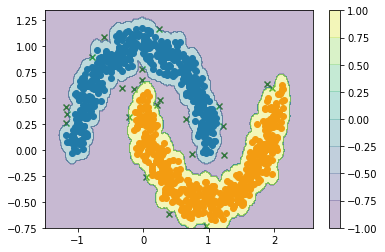

In [22]:
plot_decision_boundary(dbscan, knn, X, min_dist = 0.1)